In [2]:
import glob
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [3]:
## Loading Data 
data=pd.read_csv('ford.csv')
print(data.shape)
data.head()

(17965, 9)


model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0

In [4]:
data.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

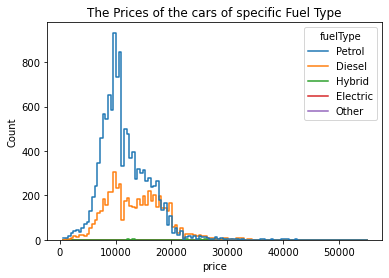

In [5]:
sns.histplot(data , x = 'price', hue = 'fuelType', fill = False, element = 'step')
plt.title("The Prices of the cars of specific Fuel Type")
plt.show()

## checking for linearity

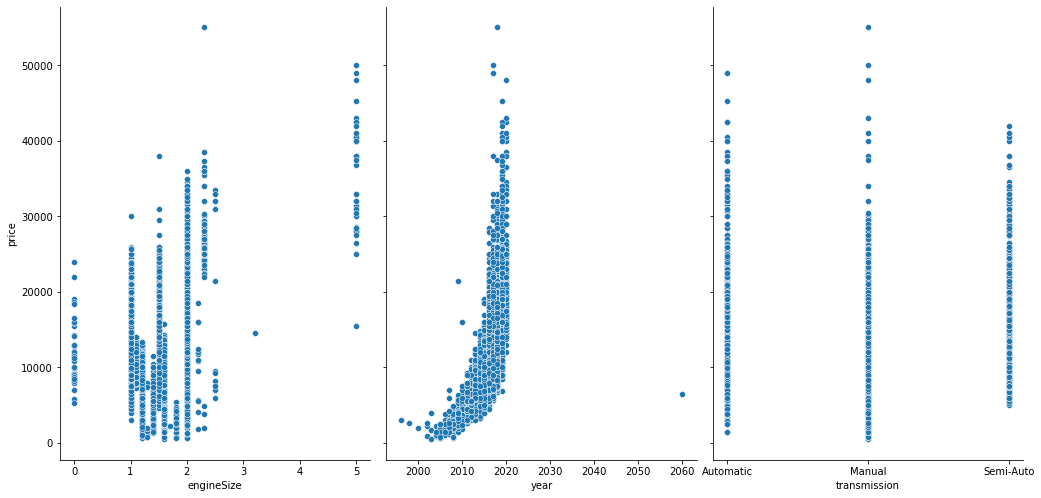

In [6]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(data, x_vars=['engineSize','year','transmission'], y_vars='price', height=7, aspect=0.7)

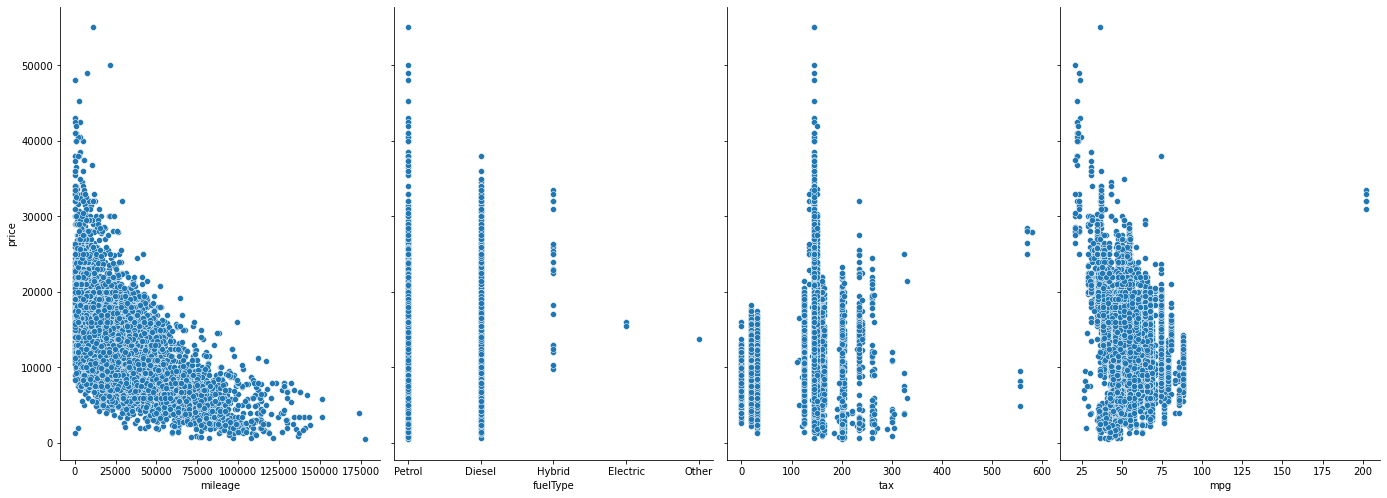

In [7]:
p = sns.pairplot(data, x_vars=['mileage','fuelType','tax','mpg'], y_vars='price', height=7, aspect=0.7)

### Converting categorical columns to numericals

In [8]:
data.drop_duplicates(inplace=True)
data.shape


(17811, 9)

In [9]:
data.model = data.model.str.strip().str.lower().str.replace(' ', '')

In [10]:
data.transmission = data.transmission.str.lower()

In [11]:
data.fuelType = data.fuelType.str.lower()

In [12]:
data[data['fuelType'] == 'electric']

model  year  price transmission  mileage  fuelType  tax   mpg  \
6385   mondeo  2016  15975    automatic     9396  electric    0  67.3   
11959  mondeo  2016  15500    automatic    24531  electric    0  67.3   

       engineSize  
6385          2.0  
11959         2.0

In [13]:
data[data['fuelType'] == 'other']

model  year  price transmission  mileage fuelType  tax   mpg  \
17492  mondeo  2015  13800    automatic    19470    other    0  67.3   

       engineSize  
17492         2.0

In [14]:
data['fuelType'].replace('other', 'electric', inplace=True)

In [15]:
data.fuelType.value_counts()

petrol      12080
diesel       5706
hybrid         22
electric        3
Name: fuelType, dtype: int64

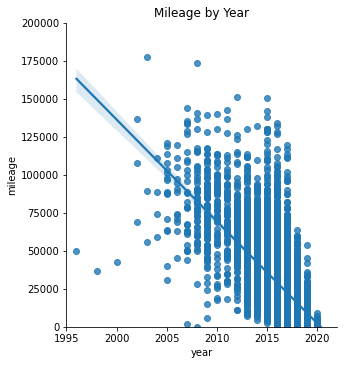

In [16]:
sns.lmplot(x='year',y='mileage',data=data)
plt.title('Mileage by Year')
plt.xlim(1995,2022)
plt.ylim(0,200000)
plt.show()

<AxesSubplot:xlabel='model', ylabel='price'>

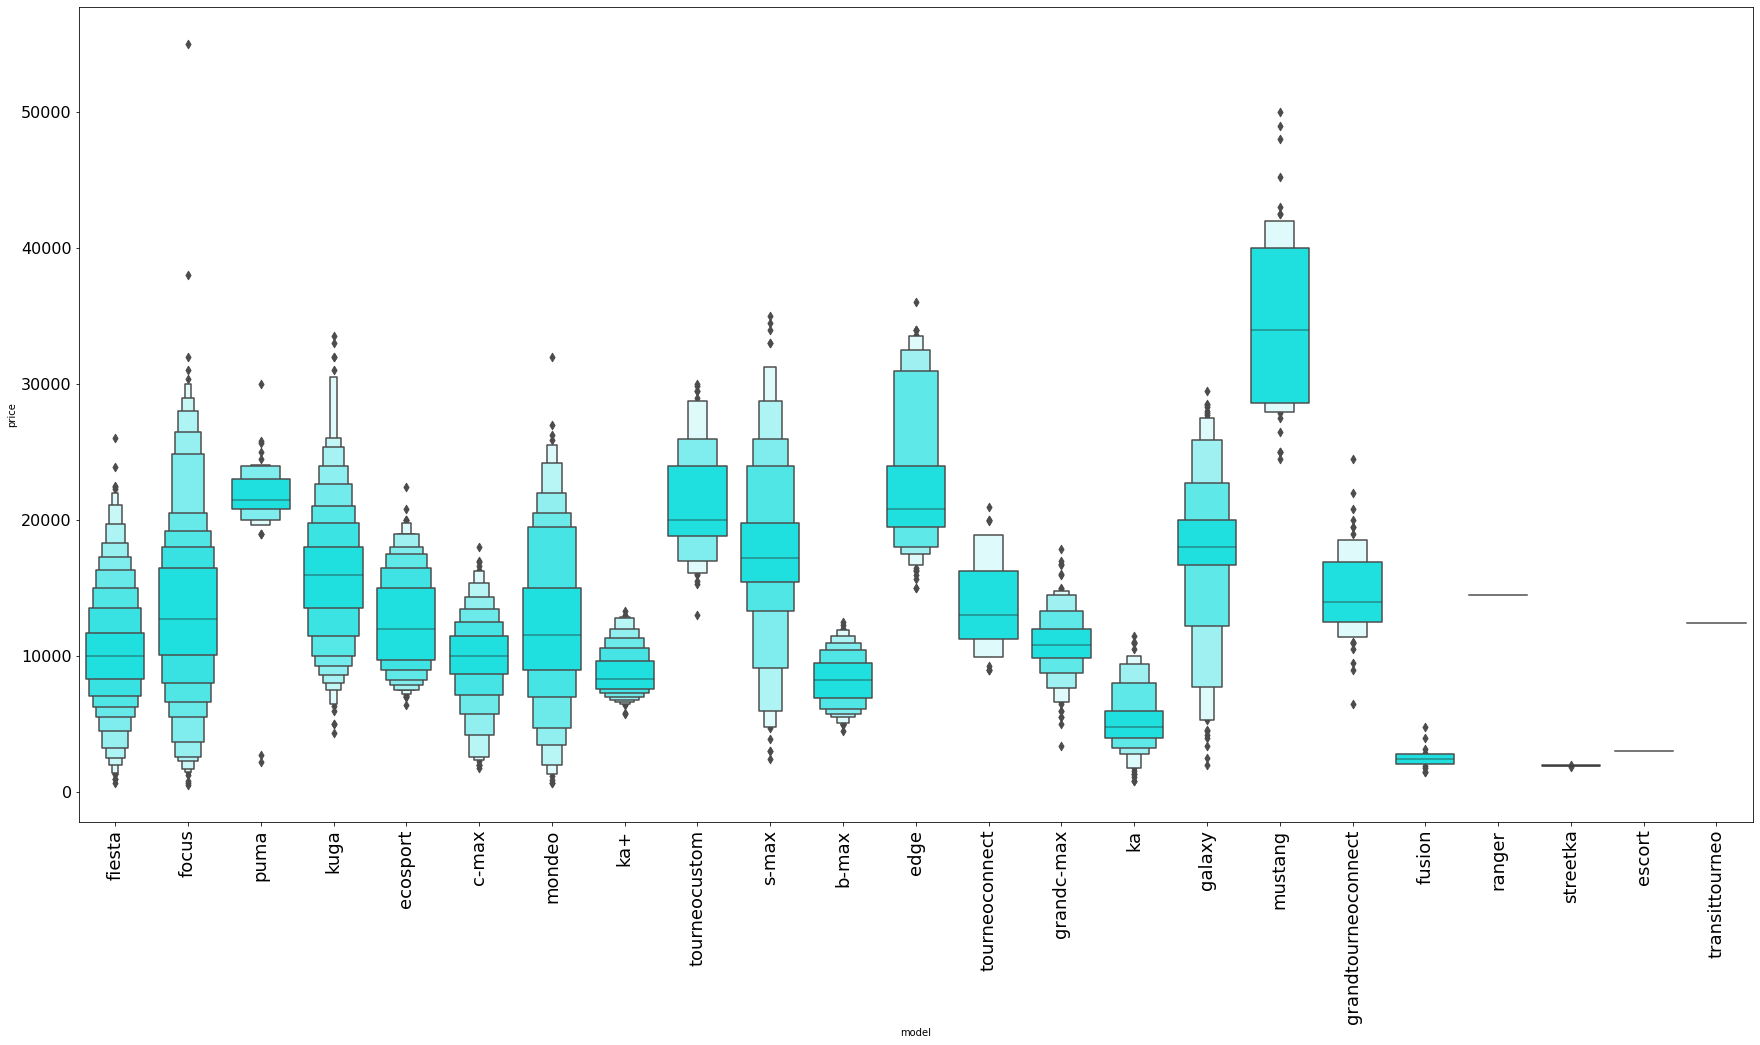

In [17]:
plt.figure(figsize=(30,15))
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=16)
sns.boxenplot(x="model", y="price",
              color="cyan",
              scale="linear", data=data)

In [18]:
print('Mustang models:', len(data[data['model'] == 'mustang']))
print('Percentage of mustang models:', round(len(data[data['model'] =='mustang'])*100/len(data), 2), '%')

Mustang models: 57
Percentage of mustang models: 0.32 %


In [19]:
data_mean, data_std = np.mean(data.price), np.std(data.price)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [20]:
print('Outliers:', len(data[~data['price'].between(lower, upper)]))
print('Percentage of emissions:', round(len(data[~data['price'].between(lower, upper)])*100/len(data), 2), '%')

Outliers: 176
Percentage of emissions: 0.99 %


In [21]:
data = data[data['price'].between(lower, upper)]

KeyboardInterrupt: 

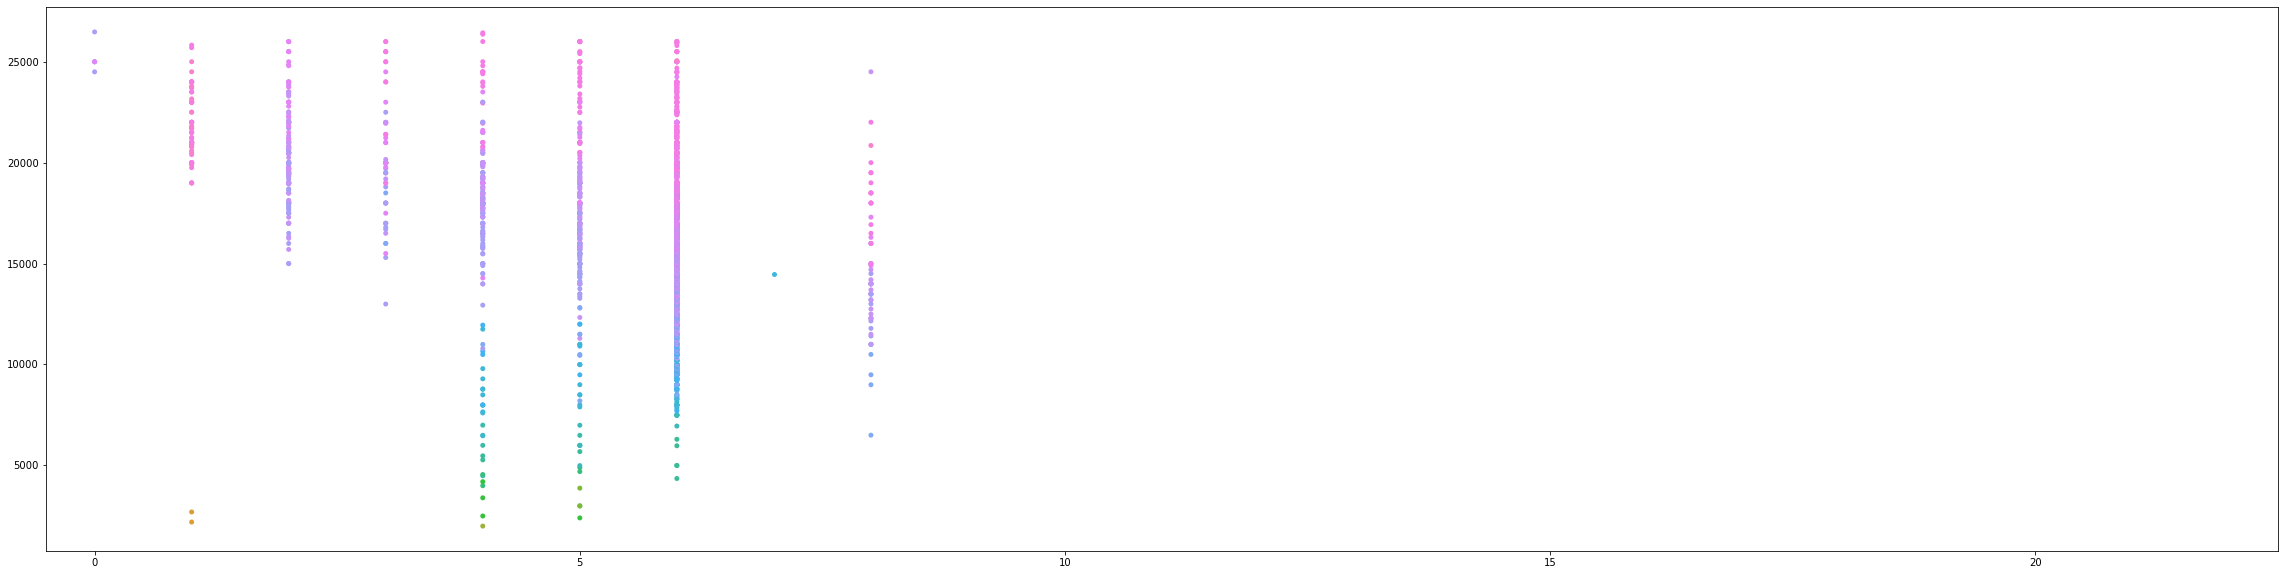

In [21]:
table= data.groupby(['model'],as_index=False)['price'].median().sort_values(by='price',ascending=False)

plt.figure(figsize=(40,10))
sns.swarmplot(x='model',y='price', data=data, order=table['model'].to_list(), hue='year')
plt.title('Price by Car Model and Year Manufactured')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

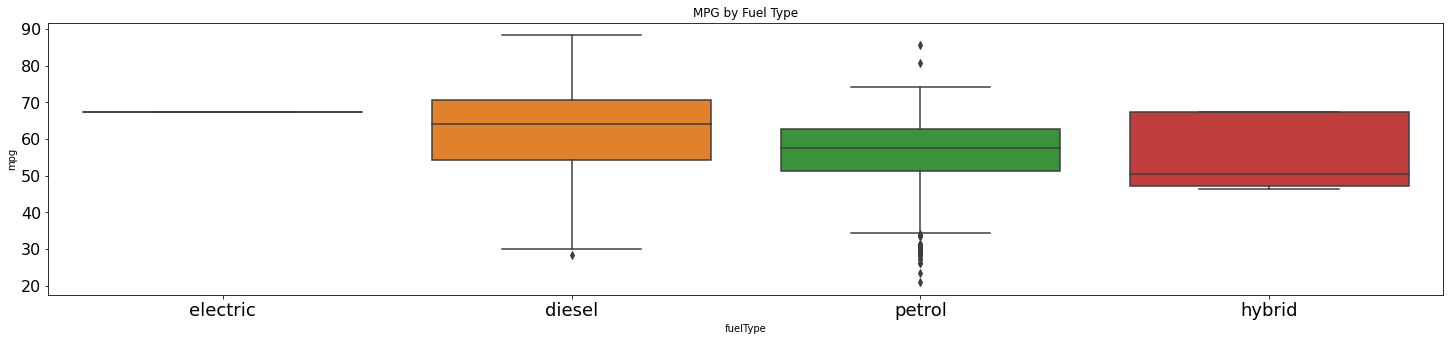

In [22]:
table_mpg = data.copy().groupby('fuelType',as_index=False)['mpg'].median().sort_values(by='mpg',ascending=False)
plt.figure(figsize=(25,5))
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
sns.boxplot(x='fuelType', y='mpg', data=data, order=table_mpg['fuelType'])
plt.title('MPG by Fuel Type')
plt.show()

KeyboardInterrupt: 

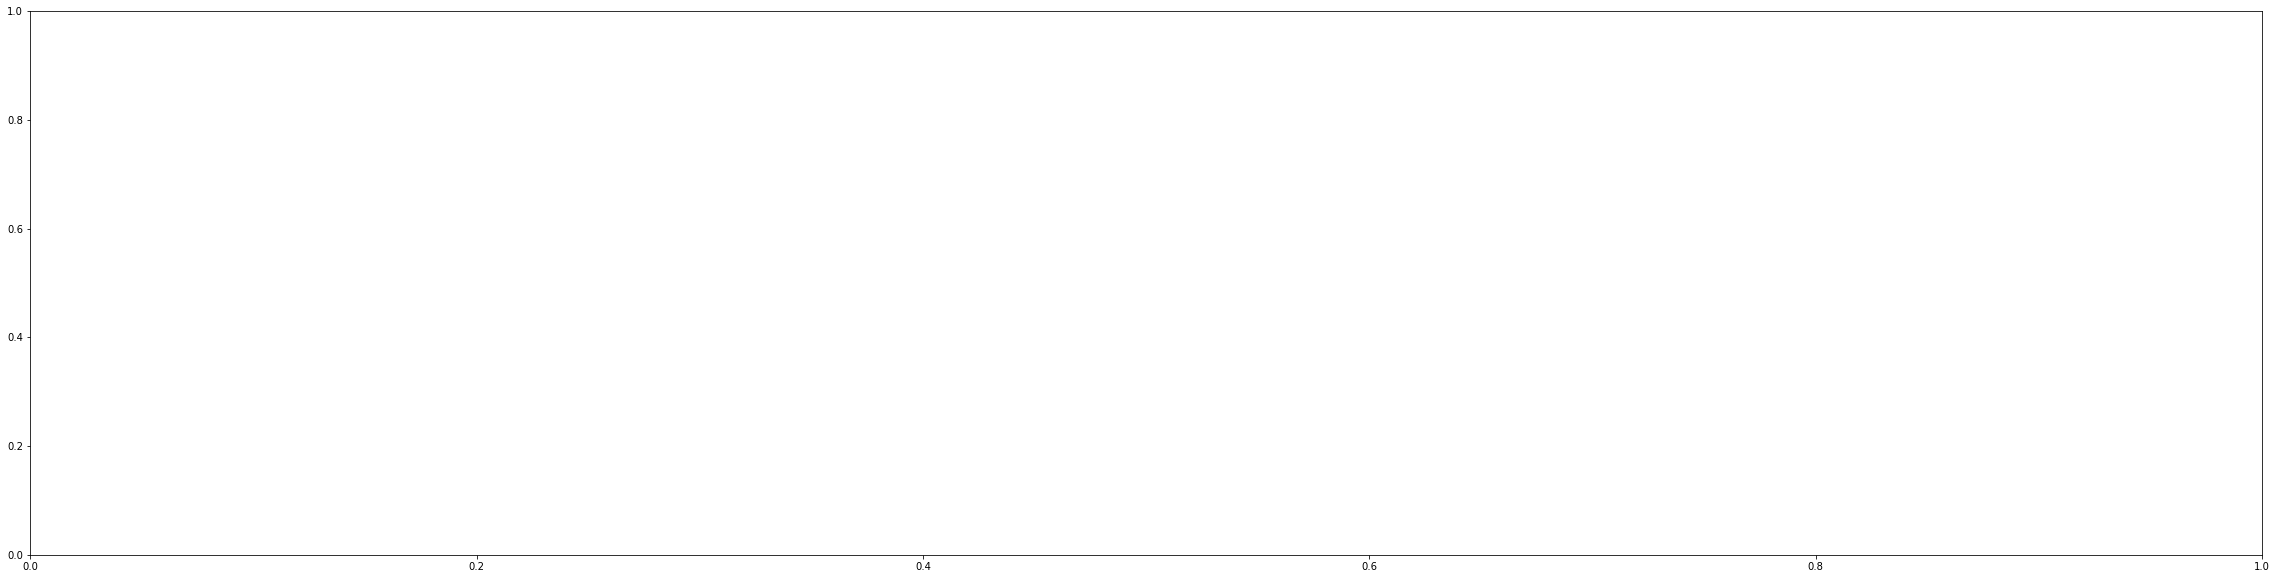

In [96]:
plt.figure(figsize=(40,10))
sns.stripplot(x='model',y='engineSize',order=data['model'].to_list(),data=data)
plt.title('Engine Size by Model')
plt.show()

In [23]:
encoder = LabelEncoder()
data["model"] = encoder.fit_transform(data['model'])
model_mapping = {index : label for index, label in enumerate(encoder.classes_)}
print(model_mapping)

data['transmission'] = encoder.fit_transform(data['transmission'])
transmission_mapping = {index:label for index, label in enumerate(encoder.classes_)}
print(transmission_mapping)

data['fuelType'] = encoder.fit_transform(data['fuelType'])
fuelType_mapping = {index:label for index, label in enumerate(encoder.classes_)}
fuelType_mapping

'''
data = pd.get_dummies(data)
data.shape
'''

{0: 'b-max', 1: 'c-max', 2: 'ecosport', 3: 'edge', 4: 'escort', 5: 'fiesta', 6: 'focus', 7: 'fusion', 8: 'galaxy', 9: 'grandc-max', 10: 'grandtourneoconnect', 11: 'ka', 12: 'ka+', 13: 'kuga', 14: 'mondeo', 15: 'mustang', 16: 'puma', 17: 'ranger', 18: 's-max', 19: 'streetka', 20: 'tourneoconnect', 21: 'tourneocustom', 22: 'transittourneo'}
{0: 'automatic', 1: 'manual', 2: 'semi-auto'}


/var/folders/39/9qjxsvtx70b08fl151rflxbh0000gn/T/ipykernel_1075/3579662045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["model"] = encoder.fit_transform(data['model'])
/var/folders/39/9qjxsvtx70b08fl151rflxbh0000gn/T/ipykernel_1075/3579662045.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transmission'] = encoder.fit_transform(data['transmission'])
/var/folders/39/9qjxsvtx70b08fl151rflxbh0000gn/T/ipykernel_1075/3579662045.py:10: SettingWithCopyWarning: 
A value is trying to be set on 

'\ndata = pd.get_dummies(data)\ndata.shape\n'

### Changing year to age of the car: 2021 as reference

In [24]:
data.year = 2021 - data.year
data = data[~(data['year'] == -39)]
data.year.unique()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([ 4,  3,  2,  6,  7,  5,  8,  1,  9, 13, 11, 12, 10, 23, 14, 16, 15,
       19, 18, 25, 17, 21])

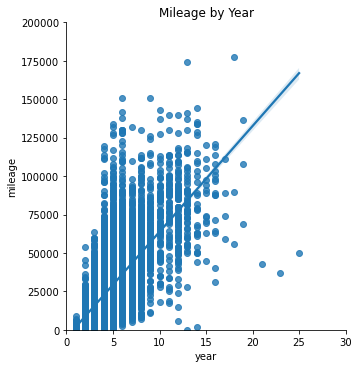

In [25]:
sns.lmplot(x='year',y='mileage',data=data)
plt.title('Mileage by Year')
plt.xlim(0,30)
plt.ylim(0,200000)
plt.show()

In [26]:
pd.DataFrame(data.corr()['price'].abs()).sort_values('price').T

transmission  fuelType     model       mpg  engineSize       tax  \
price       0.06492   0.20884  0.312431  0.319333    0.321962  0.419983   

        mileage      year  price  
price  0.546682  0.672069    1.0

In [27]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [28]:
#separate the other attributes from the predicting attribute
import statsmodels.api as sm

#separte the predicting attribute into Y for model training 
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data)
x_scaled=scaler.transform(data)
x_df=pd.DataFrame(x_scaled,columns=data.columns)
print(x_scaled)
x_df


[[-0.45612179 -0.0785024  -0.017792   ...  0.60263582 -0.03991678
  -0.86092151]
 [-0.20426647 -0.57219401  0.44570797 ...  0.60263582 -0.03991678
  -0.86092151]
 [-0.20426647 -0.0785024   0.21395799 ...  0.60263582 -0.03991678
  -0.86092151]
 ...
 [-1.71539842  1.40257245 -1.06089867 ... -1.34344158 -0.03991678
  -0.86092151]
 [-0.20426647  0.90888083 -0.48152371 ... -1.5056147   0.96117477
   0.67470806]
 [ 1.05501016 -0.57219401 -0.87549869 ...  0.52154926 -0.03991678
  -0.34904499]]


model      year     price  transmission   mileage  fuelType  \
0     -0.456122 -0.078502 -0.017792     -2.719144 -0.391678  0.684943   
1     -0.204266 -0.572194  0.445708      0.043395 -0.744844  0.684943   
2     -0.204266 -0.078502  0.213958      0.043395 -0.571221  0.684943   
3     -0.456122 -1.065886  1.256833      0.043395 -0.673964  0.684943   
4     -0.456122 -1.065886  1.025083     -2.719144 -1.136101  0.684943   
...         ...       ...       ...           ...       ...       ...   
17629 -0.456122  0.415189 -0.945024      0.043395  0.401233  0.684943   
17630 -1.715398 -0.078502 -0.713274      0.043395 -0.352764  0.684943   
17631 -1.715398  1.402572 -1.060899      0.043395  0.882622  0.684943   
17632 -0.204266  0.908881 -0.481524      0.043395 -0.851551 -1.461671   
17633  1.055010 -0.572194 -0.875499      0.043395 -0.954654  0.684943   

            tax       mpg  engineSize  
0      0.602636 -0.039917   -0.860922  
1      0.602636 -0.039917   -0.860922  
2      0.602636 -0.039917   -0.860922  
3      0.521549 -1.854395    0.418770  
4      0.521549 -0.978440   -0.860922  
...         ...       ...         ...  
17629  0.197203 -0.394470   -0.349045  
17630  0.602636 -1.145289    0.162832  
17631 -1.343442 -0.039917   -0.860922  
17632 -1.505615  0.961175    0.674708  
17633  0.521549 -0.039917   -0.349045  

[17634 rows x 9 columns]

In [29]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [30]:
import plotly.graph_objects as go
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x = x, y = y, z =z_final ))
fig.show()

NameError: name 'x_input' is not defined

In [103]:
'''from sklearn.preprocessing import LabelEncoder  

label_encoder_x= LabelEncoder()  

x['Index']= label_encoder_x.fit_transform(x['Index'])

'''
'''
# handle categorical variable
Index=pd.get_dummies(x,drop_first=True)
# dropping extra column
x= x.drop(‘State’,axis=1)
# concatation of independent variables and new cateorical variable.
x=pd.concat([x,states],axis=1)
'''

'\n# handle categorical variable\nIndex=pd.get_dummies(x,drop_first=True)\n# dropping extra column\nx= x.drop(‘State’,axis=1)\n# concatation of independent variables and new cateorical variable.\nx=pd.concat([x,states],axis=1)\n'

In [104]:
print(x.tail(10))

NameError: name 'x' is not defined

<AxesSubplot:ylabel='Frequency'>

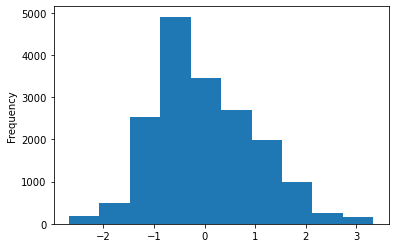

In [105]:
y.plot.hist()

In [31]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
X = x_df.drop(['price'], axis=1)
y = x_df.price
model_OLS = sm.OLS(y, X).fit()
print(model_OLS.summary())


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.744
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              6405.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):                        0.00
Time:                        13:21:02   Log-Likelihood:                         -13006.
No. Observations:               17634   AIC:                                  2.603e+04
Df Residuals:                   17626   BIC:                                  2.609e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

ValueError: x and y must be the same size

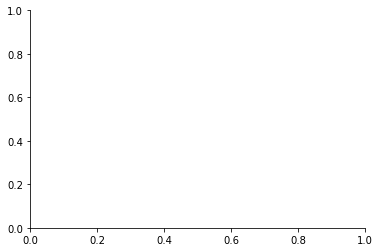

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.scatter(x_test, y_test, c='#edbf6f', label='Testing data')
plt.scatter(x_train, y_train, c='#8acfd4', label='Training data')
plt.legend(loc="upper left")
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error


ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(x_scaled, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)



(100, 9)

Text(0, 0.5, 'weights')

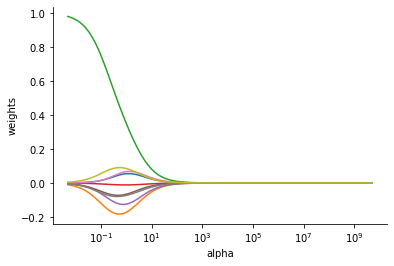

In [40]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')



In [41]:
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
ridge2 = Ridge(alpha=0.99,normalize = True)
ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(x_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE



model           0.087546
year           -0.264764
transmission   -0.019435
mileage        -0.195940
fuelType       -0.101699
tax             0.102653
mpg            -0.115133
engineSize      0.132793
dtype: float64
0.3798154091438382


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import Lasso
import random
# define grid
ridge_model = Ridge()
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(ridge_model, grid, scoring='neg_mean_absolute_error', n_jobs=-1)
# perform the search
results = search.fit(x_train, y_train)
# summarize
#print('MAE: %.3f' % results)
print('Config: %s' % results.best_params_)

Config: {'alpha': 0.99}


In [43]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(x_train, y_train)
mean_squared_error(y_test, ridge4.predict(x_test))

NameError: name 'ridgecv' is not defined

In [ ]:

ridge2.fit(x_train, y_train)
pd.Series(ridge2.coef_, index = X.columns)

## finally, if we execute this then our model will be ready, now we have x_test data we use this data for the prediction of high value.

In [44]:
y_prediction=ridge2.predict(x_test)
y_prediction

array([-0.34209578, -0.26393413, -0.00401239, ..., -0.01399169,
        0.30942942, -0.4854631 ])

## Now, we have to compare the y_prediction values with the original values because we have to calculate the accuracy of our model, which was implemented by a concept called r2_score. let’s discuss briefly on r2_score:




### r2_score:-

### It is a function inside sklearn. metrics module, where the value of r2_score varies between 0 and 100 percent,  we can say that it is closely related to MSE.



## Calculating  R-Squared

In [45]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('mean_abs_error is==',mean_absolute_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))


r2 socre is  0.6218437641929457
mean_sqrd_error is== 0.3798154091438382
mean_abs_error is== 0.47972761430186495
root_mean_squared error of is== 0.6162916591548503


### the accuracy score is greater than 0.8 it means we can use this model to solve multiple linear regression, and also mean squared error rate is also low.



### checking for correlation

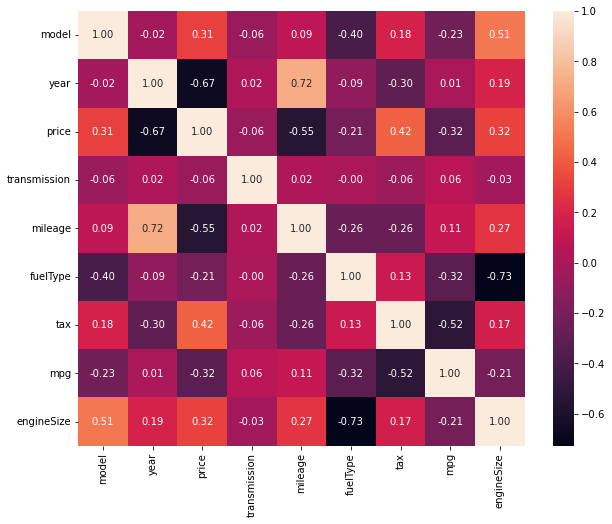

In [46]:
corr = data.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', ax=ax);


#### in the above array first array is the F-statistic and next one is the P-Value
#### If p-value is >0.05 then its not significant statistically
#### In other words, a predictor that has a low p-value is likely to be a meaningful addition 
#### to your model because changes in the predictor's value are related to changes in the response variable.

### As suggested in the previous lecture, the F-regression does not take into account the interrelation of the features.¶
### A not so simple fix for that is to ammend the LinearRegression() class

### Standardization

## Checking for 5 Assumptions in Regression:

### 1. Linearity:

#### Linear regression needs the relationship between the independent and dependent variables to be linear.
#### Let's use a pair plot to check the relation of independent variables with the Sales variable

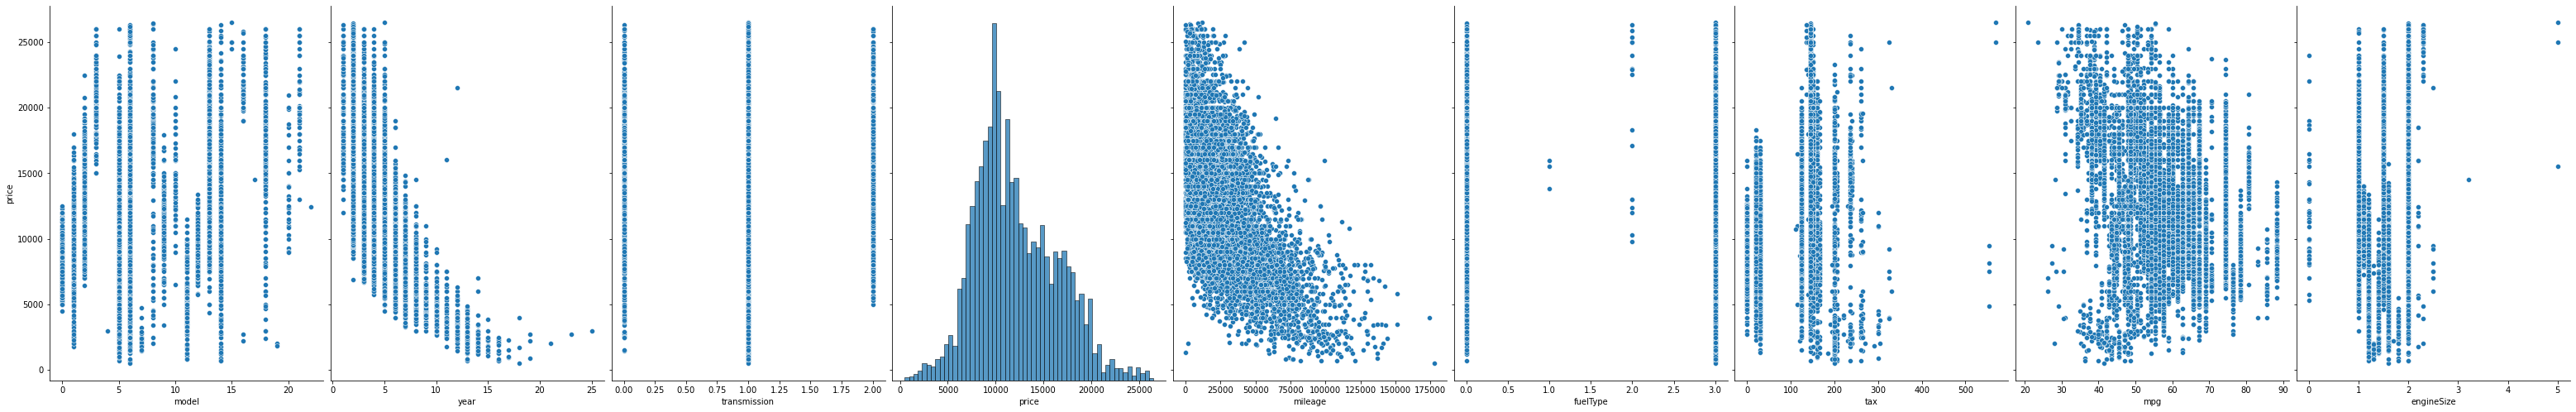

In [47]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(data, x_vars=['model','year','transmission','price','mileage','fuelType','tax','mpg','engineSize'], y_vars='price', height=7, aspect=0.7)

### 2. Mean of Residuals


#### Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero

In [48]:
residuals=y_pred_poly-y_test
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

NameError: name 'y_pred_poly' is not defined

### 3. Check for Homoscedasticity
#### Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms 
#### with predicted terms we can check that there should not be any pattern in the error terms.

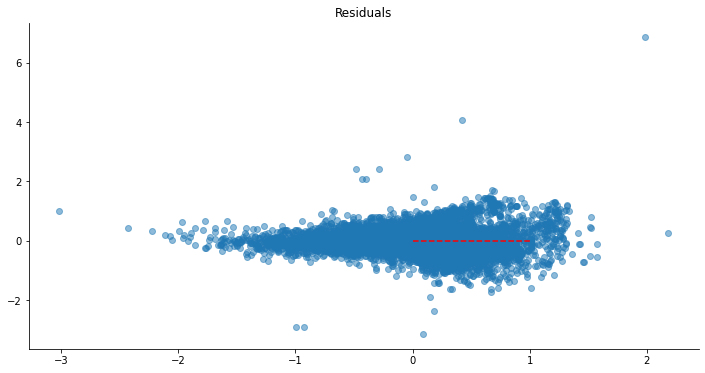

In [214]:
'''p = sns.scatterplot(y_prediction,residuals)
plt.xlabel('y_prediction/predicted values')
plt.ylabel('Residuals')
plt.ylim(-20,20)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
'''

plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=y_prediction, y=residuals, alpha=0.5)
plt.plot(np.repeat(0,y_prediction.max()), color='red', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

### 4. Check for Normality of error terms/residuals


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



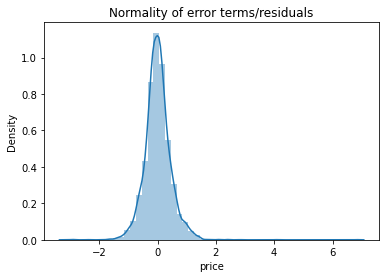

In [215]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

### 5. No autocorrelation of residuals

In [219]:
from statsmodels.stats.stattools import durbin_watson
print('Assumption 3: No Autocorrelation', '\n')


print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
durbinWatson = durbin_watson(residuals)
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')


Assumption 3: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.01412886637098
Little to no autocorrelation 

Assumption satisfied


### 6. No perfect multicollinearity

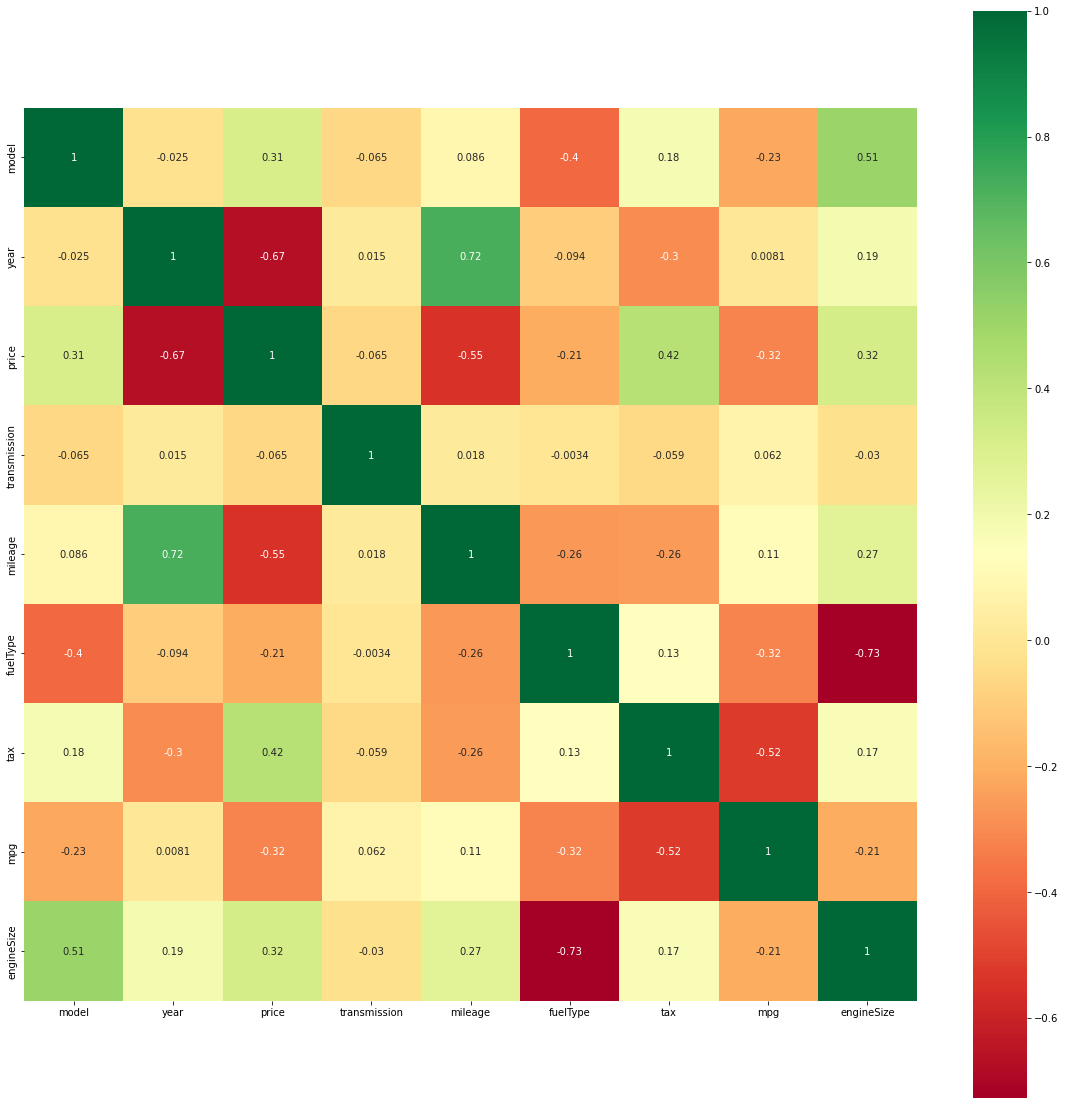

In [217]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

#### In regression, multicollinearity refers to the extent to which independent variables are correlated. 
#### Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, 
#### precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, 
#### and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

### Calculating Adjusted R-Squared

### Formula for Adjusted R-Squared
### $R^2(adj.)=1-(1-R^2)*\frac{n-1}{n-p-1}$

In [121]:
import statsmodels.api as sm

r2=r2_score(y_test,y_prediction)
#print(r2)
print(X.shape)
n=X.shape[0]  # 84 obserrvations
p=X.shape[1] #2 features
adjusted_r2= 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

(17634, 8)


0.6899725456456158

## ******************************Multilinear Regression***************************************************

In [49]:

# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [50]:
y_prediction_LR =  LR.predict(x_test)
y_prediction_LR.shape
x_test.shape

(7054, 8)

## Now, we have to compare the y_prediction values with the original values because we have to calculate the accuracy of our model, which was implemented by a concept called r2_score. let’s discuss briefly on r2_score:

## Calculating  R-Squared

In [51]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score_LR=r2_score(y_test,y_prediction_LR)
MSE=mean_squared_error(y_test,y_prediction_LR)
print('r2 socre is ',score_LR)
print('mean_sqrd_error is==',MSE)
print('mean_abs_error is==',mean_absolute_error(y_test,y_prediction_LR))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction_LR)))



r2 socre is  0.7425397824254844
mean_sqrd_error is== 0.25858983302927757
mean_abs_error is== 0.38650985256491516
root_mean_squared error of is== 0.508517288820427


### Calculating Adjusted R-Squared

### Formula for Adjusted R-Squared
### $R^2(adj.)=1-(1-R^2)*\frac{n-1}{n-p-1}$

In [52]:
import statsmodels.api as sm

r2_LR=r2_score(y_test,y_prediction_LR)
#print(r2)
print(X.shape)
n=X.shape[0]  # 84 obserrvations
p=X.shape[1] #2 features
adjusted_r2_LR= 1-(1-r2_LR)*(n-1)/(n-p-1)
adjusted_r2_LR

(17634, 8)


0.7424229210501314

## ********************Lasso regression*****************

In [142]:
import numpy as np
def MAPE(y_test,y_prediction_Lasso):
    mape = np.mean(np.abs((y_test - y_prediction_Lasso)/y_test))*100
    return mape


In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import Lasso
import random
# define grid
lasso_model = Lasso()
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(lasso_model, grid, scoring='neg_mean_absolute_error', n_jobs=-1)
# perform the search
results = search.fit(x_train, y_train)
# summarize
#print('MAE: %.3f' % results)
print('Config: %s' % results.best_params_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_pa

Config: {'alpha': 0.0}


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1797.9433147117395, tolerance: 1.4066759807341203
  model = cd_fast.enet_coordinate_descent(


In [160]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.0)
lasso=lasso_model.fit(x_train , y_train)
lasso_predict = lasso.predict(x_test)
Lasso_MAPE = MAPE(y_test,lasso_predict)
print("MAPE value: ",Lasso_MAPE)
Accuracy = 100 - Lasso_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracy))

MAPE value:  110.01350382684998
Accuracy of Lasso Regression: -10.01%.


/var/folders/39/9qjxsvtx70b08fl151rflxbh0000gn/T/ipykernel_7250/11578110.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso=lasso_model.fit(x_train , y_train)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1797.9433147117395, tolerance: 1.4066759807341203
  model = cd_fast.enet_coordinate_descent(


## Calculating  R-Squared

In [161]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score_Lasso=r2_score(y_test,lasso_predict)
print('r2 socre is ',score_Lasso)
print('mean_sqrd_error is==',mean_squared_error(y_test,lasso_predict))
print('mean_abs_error is==',mean_absolute_error(y_test,lasso_predict))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,lasso_predict)))




r2 socre is  0.7425840267845163
mean_sqrd_error is== 0.2603300007957292
mean_abs_error is== 0.39030575748843405
root_mean_squared error of is== 0.5102254411490368


### Formula for Adjusted R-Squared
### $R^2(adj.)=1-(1-R^2)*\frac{n-1}{n-p-1}$

In [129]:
import statsmodels.api as sm

r2_Lasso=r2_score(y_test,lasso_predict)
#print(r2)
print(X.shape)
n=X.shape[0]  # 84 obserrvations
p=X.shape[1] #2 features
adjusted_r2_Lasso= 1-(1-r2_Lasso)*(n-1)/(n-p-1)
adjusted_r2_Lasso

(17634, 8)


-0.0005638063204111976

## ************************Polynomial Regression**********************

<AxesSubplot:>

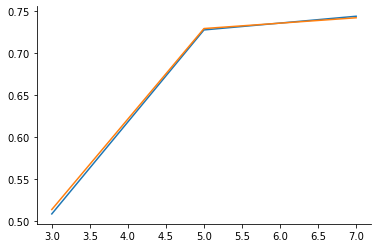

In [55]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
column_names = data.drop(columns = ['price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range(3, 9, 2):
    selector = SelectKBest(f_regression, k = k)
    x_train_transformed = selector.fit_transform(x_train, y_train)
    x_test_transformed = selector.transform(x_test)
    regressor = LinearRegression()
    regressor.fit(x_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(x_train_transformed, y_train))
    r_squared_test.append(regressor.score(x_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

In [35]:

from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(x_train)
 
poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

NameError: name 'LinearRegression' is not defined

In [200]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(x_train)

X_test_transformed_poly = poly.transform(x_test)

In [201]:
# Predicting a new result with Polynomial Regression
lin2 = LinearRegression()
lin2.fit(X_train_transformed_poly, y_train)
y_pred_poly=lin2.predict(X_test_transformed_poly)



In [202]:
# Training the dataset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [51]:
# Polynomial 
from sklearn.pipeline import Pipeline

In [52]:
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [53]:
poly_pred=pipe.predict(x_test)


In [203]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score_poly=r2_score(y_test,y_pred_poly)
print('r2 socre is ',score_poly)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred_poly))
print('mean_abs_error is==',mean_absolute_error(y_test,y_pred_poly))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred_poly)))

r2 socre is  0.8056838662820429
mean_sqrd_error is== 0.19516870235875633
mean_abs_error is== 0.32090800165797795
root_mean_squared error of is== 0.4417790198263792


## *********CatBooast Regressor***********

In [131]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, x_test, y_test, n_repeats=10, random_state=0, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)


In [137]:
def regression(model):
    reg = model
    reg.fit(x_train, y_train)
    score_all = cross_val_score(reg, x_train, y_train, cv=5, scoring='r2').mean()
    return reg, score_all

In [138]:
from catboost import metrics, cv, CatBoostRegressor

from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score

models = {'RandomForestRegressor':RandomForestRegressor(), 
           'CatBoostRegressor':CatBoostRegressor(),
           'DecisionTreeRegressor':DecisionTreeRegressor()}

In [139]:
evaluation_table = pd.DataFrame(columns=['Model', 'R2 Score'])

models = { 'RandomForestRegressor':RandomForestRegressor(), 
           'CatBoostRegressor':CatBoostRegressor(silent=True),
           'DecisionTreeRegressor':DecisionTreeRegressor()}

for name,model in models.items():
    reg, score_all = regression(model)
    evaluation_table = evaluation_table.append({'Model': name, 'R2 Score': score_all},
                                               ignore_index=True)

evaluation_table

Model  R2 Score
0  RandomForestRegressor  0.925003
1      CatBoostRegressor  0.939809
2  DecisionTreeRegressor  0.882348

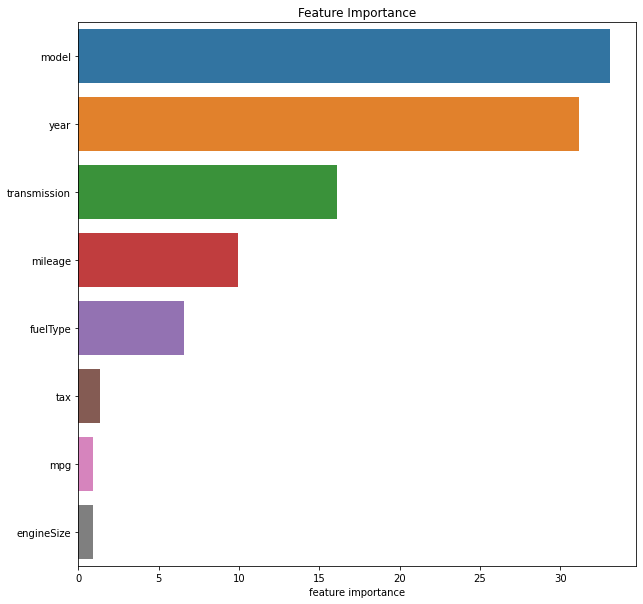

In [140]:
cat = CatBoostRegressor(silent=True)
cat.fit(x_train, y_train)
feature_imp = pd.DataFrame(cat.get_feature_importance()).sort_values(by=0,ascending=False)
feature_imp.index = x_train.columns
feature_imp.columns = ['feature importance']

plt.subplots(figsize=(10,10))
sns.barplot(x=feature_imp['feature importance'], y=feature_imp.index)
plt.title('Feature Importance')
plt.show()

In [211]:

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['R2 Score', 'Model']),
                 cells=dict(values=[['0.625', '0.742', '0.743',
          '0.798'], ['Ridge','Lasso','Multilinear','Polynomial']]))
                     ])
fig.show()